Notebook for examinng residuals and error in residuals

In [1]:
# figures.py imports
from __future__ import division

import datetime


import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from nowcast import residuals, analyze, figures
import matplotlib.dates as mdates
from dateutil import tz

%matplotlib inline

In [2]:
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

In [3]:
t_orig=datetime.datetime(2015, 5, 1)
t_final=datetime.datetime(2015, 5, 2)

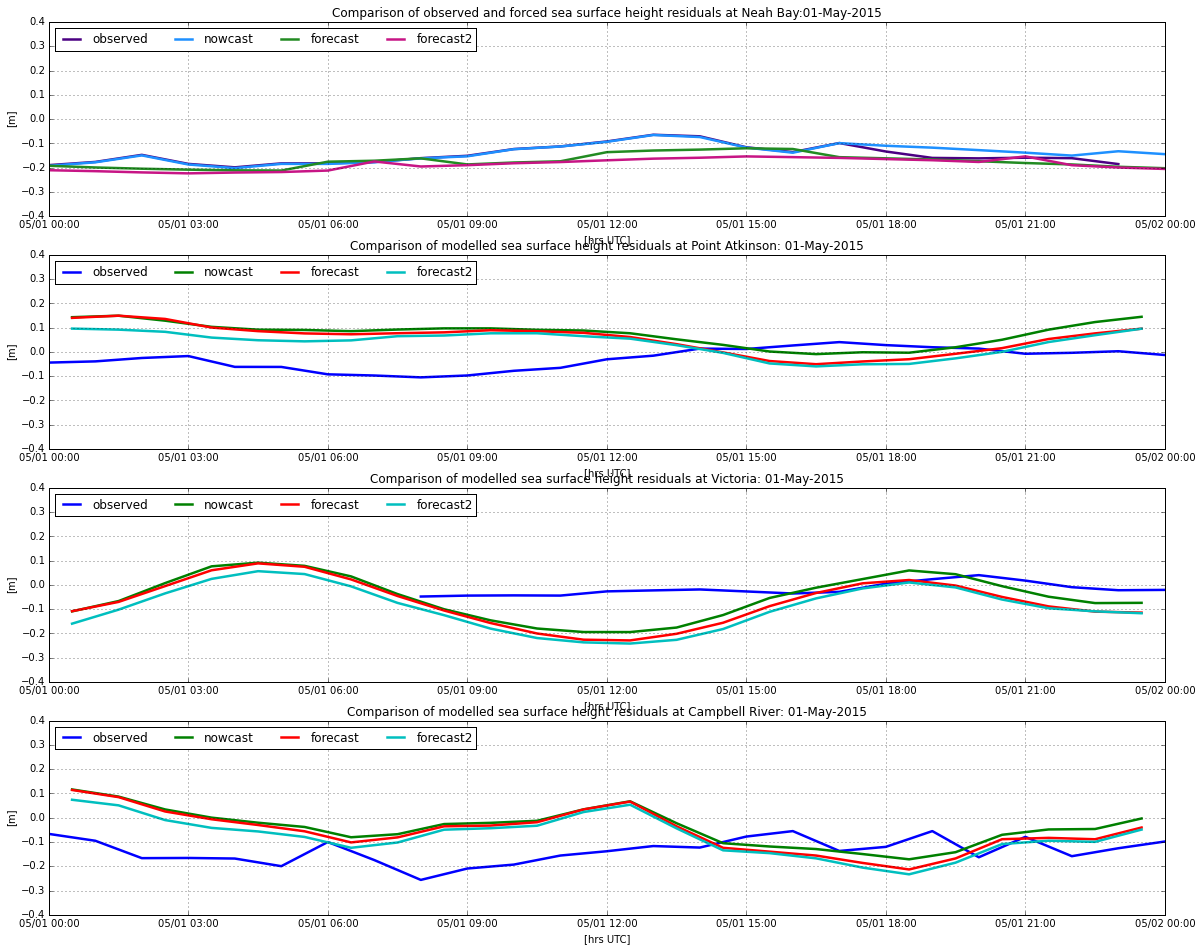

In [4]:
fig = residuals.plot_residual_error_all('residual', bathy, t_orig)

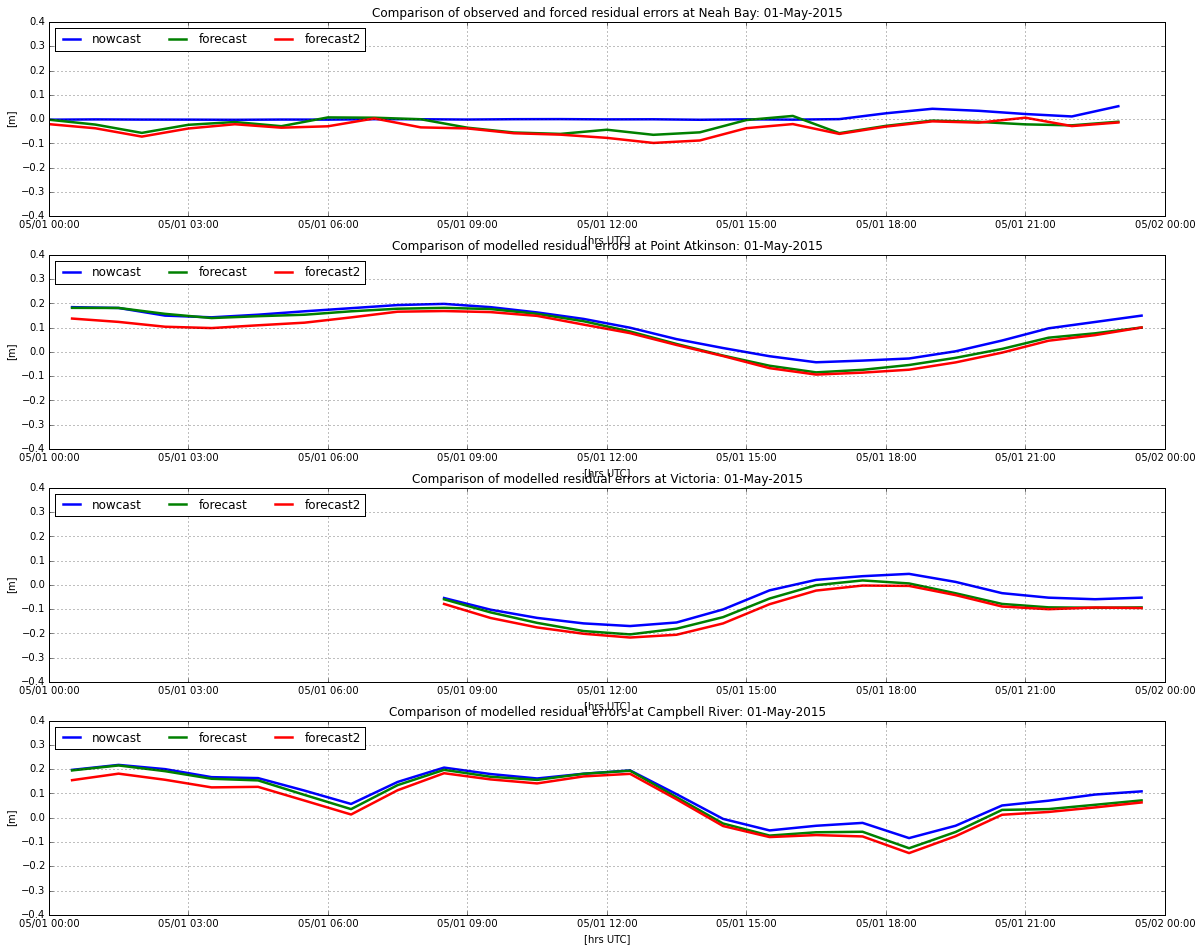

In [5]:
fig = residuals.plot_residual_error_all('error', bathy, t_orig)

In [6]:
t_orig=datetime.datetime(2015, 5, 1)
t_final=datetime.datetime(2015, 5, 31)

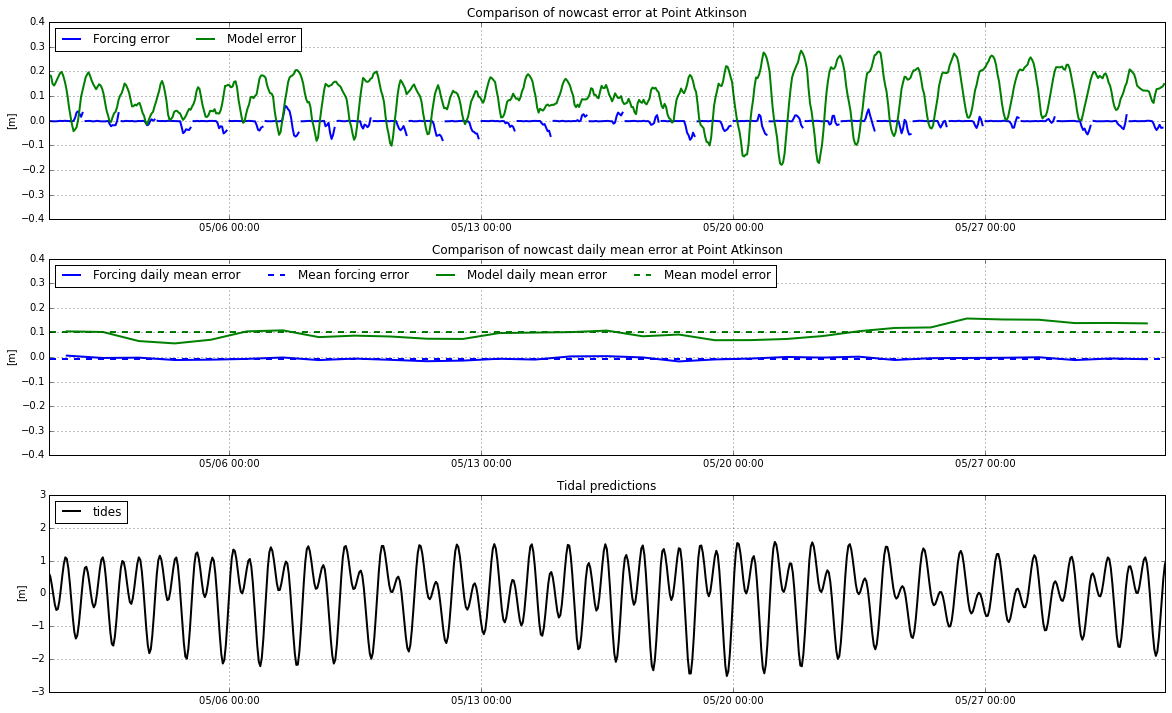

In [7]:

fig = residuals.compare_errors('Point Atkinson', 'nowcast', t_orig,t_final,bathy)

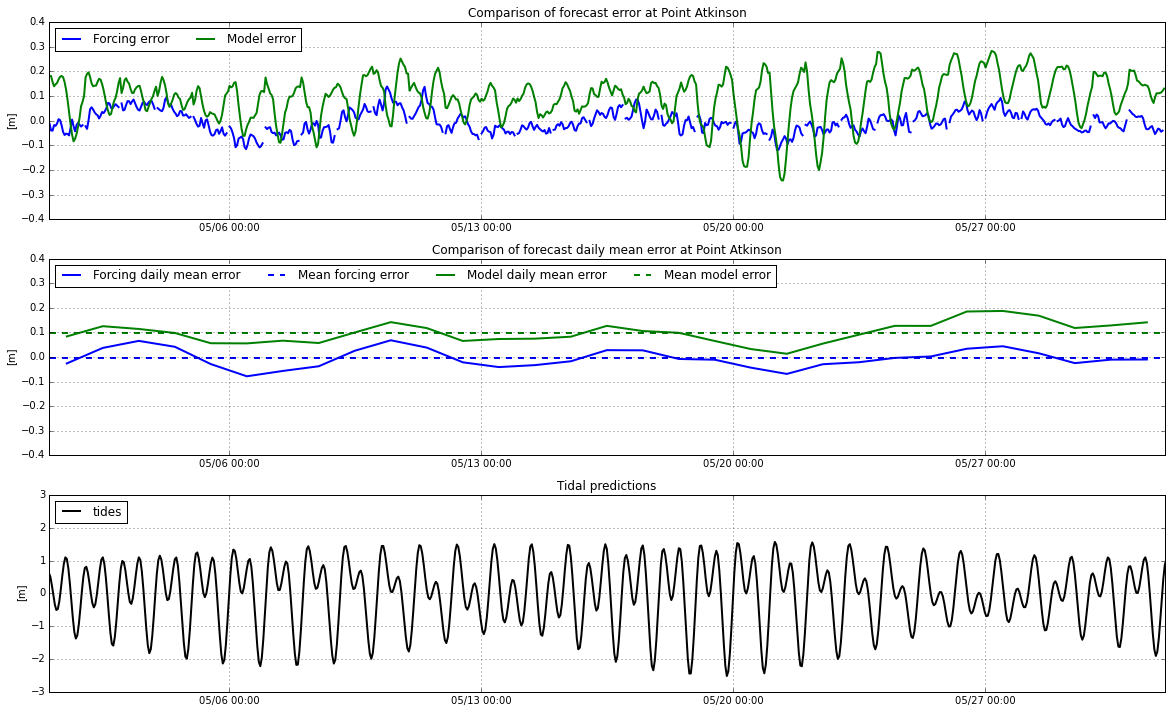

In [8]:
fig = residuals.compare_errors('Point Atkinson', 'forecast', t_orig,t_final,bathy)

forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur


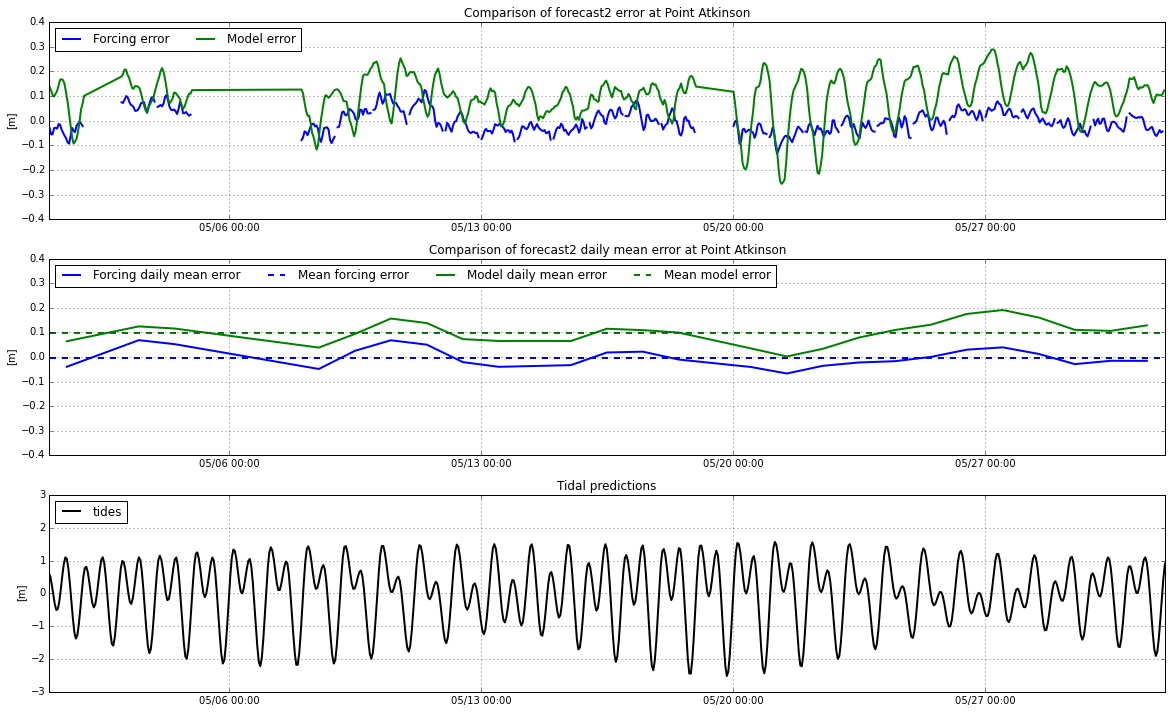

In [9]:
fig = residuals.compare_errors('Point Atkinson', 'forecast2', t_orig,t_final,bathy)

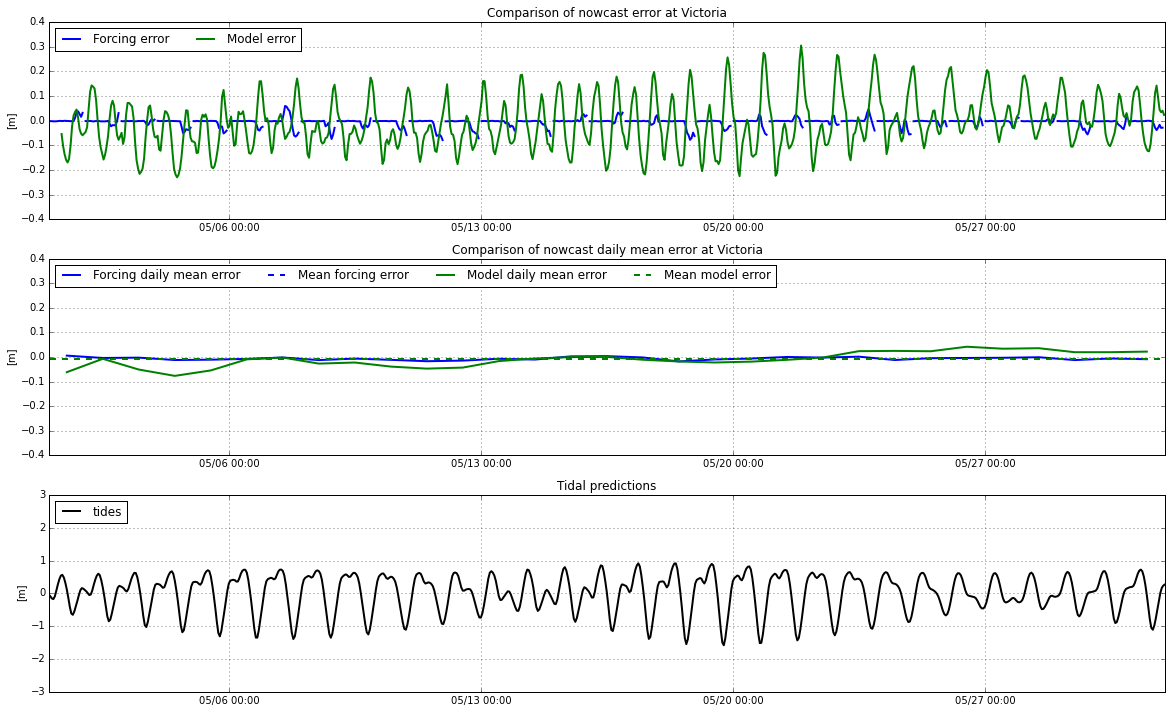

In [10]:
fig = residuals.compare_errors('Victoria', 'nowcast', t_orig,t_final,bathy)

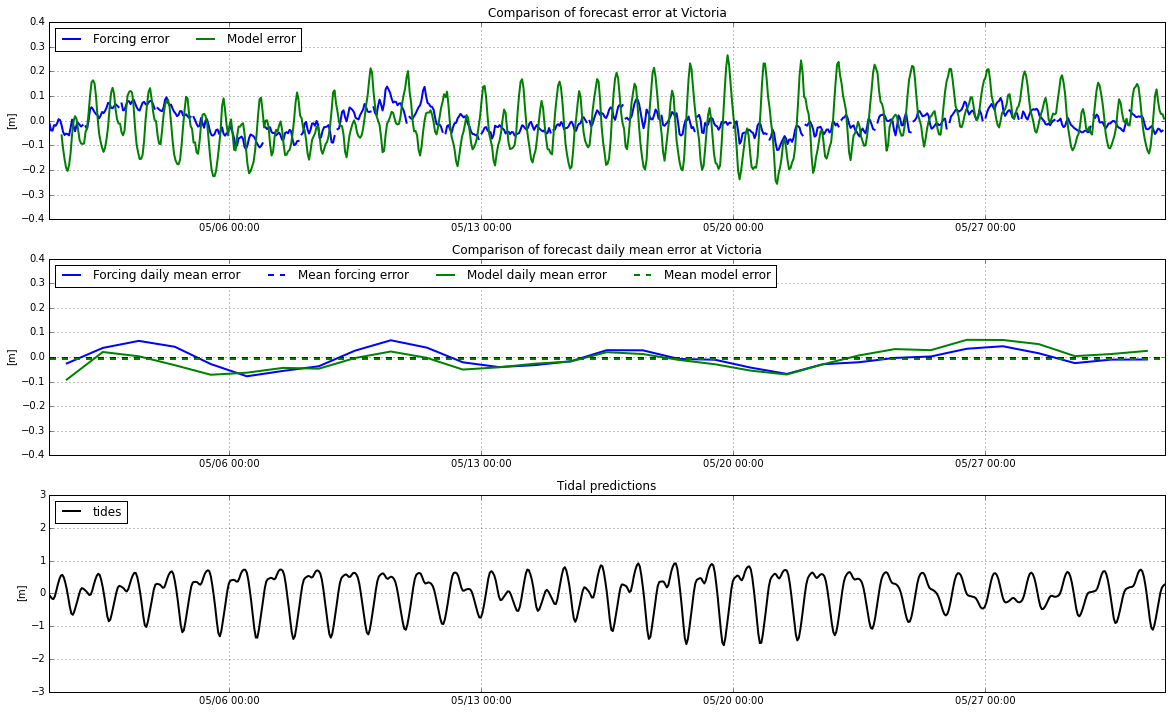

In [11]:
fig = residuals.compare_errors('Victoria', 'forecast', t_orig,t_final,bathy)

forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur


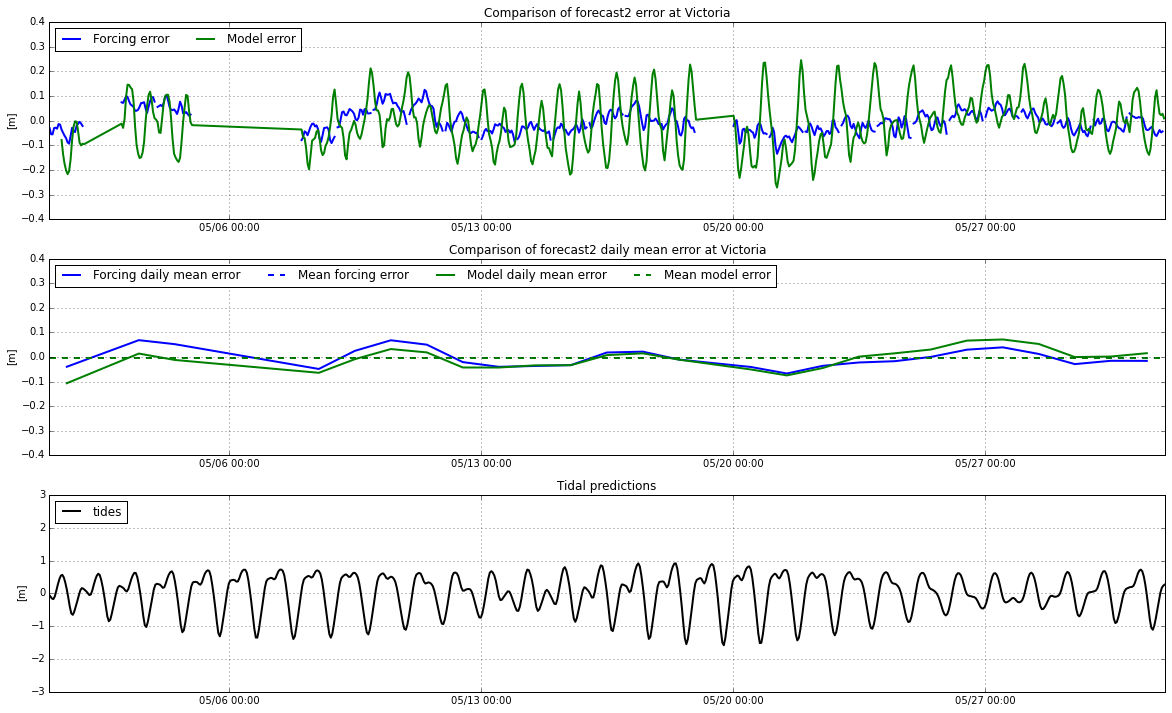

In [12]:
fig = residuals.compare_errors('Victoria', 'forecast2', t_orig,t_final,bathy)

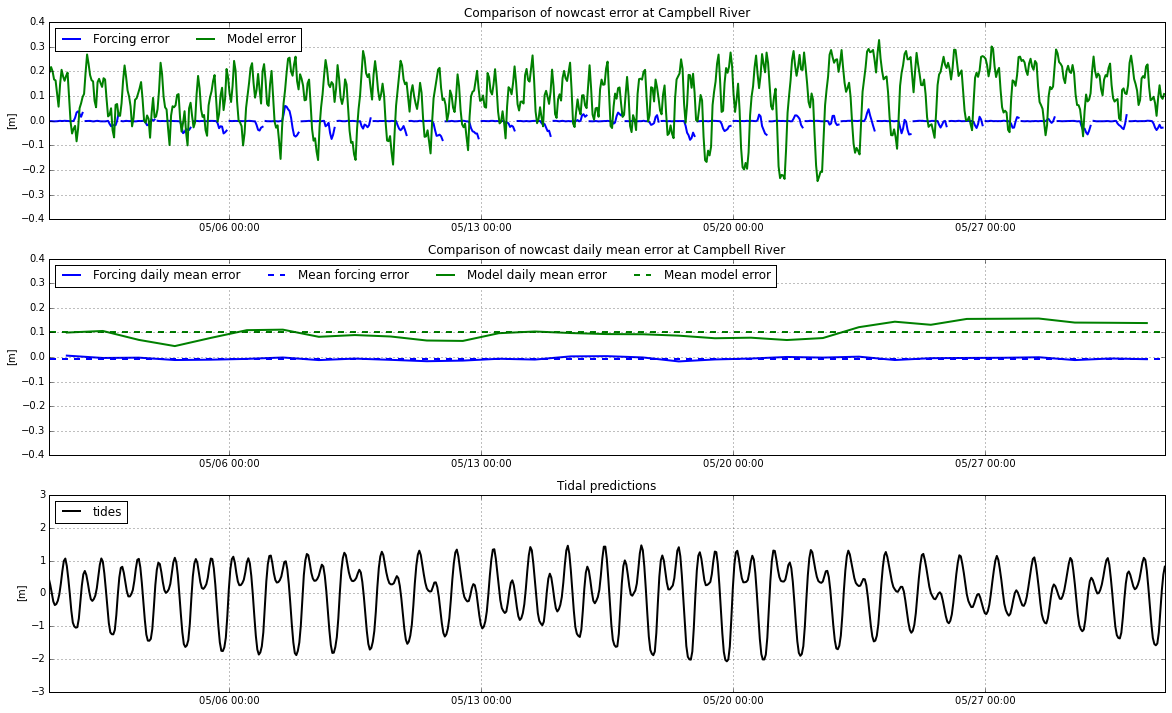

In [13]:
fig = residuals.compare_errors('Campbell River', 'nowcast', t_orig,t_final,bathy)

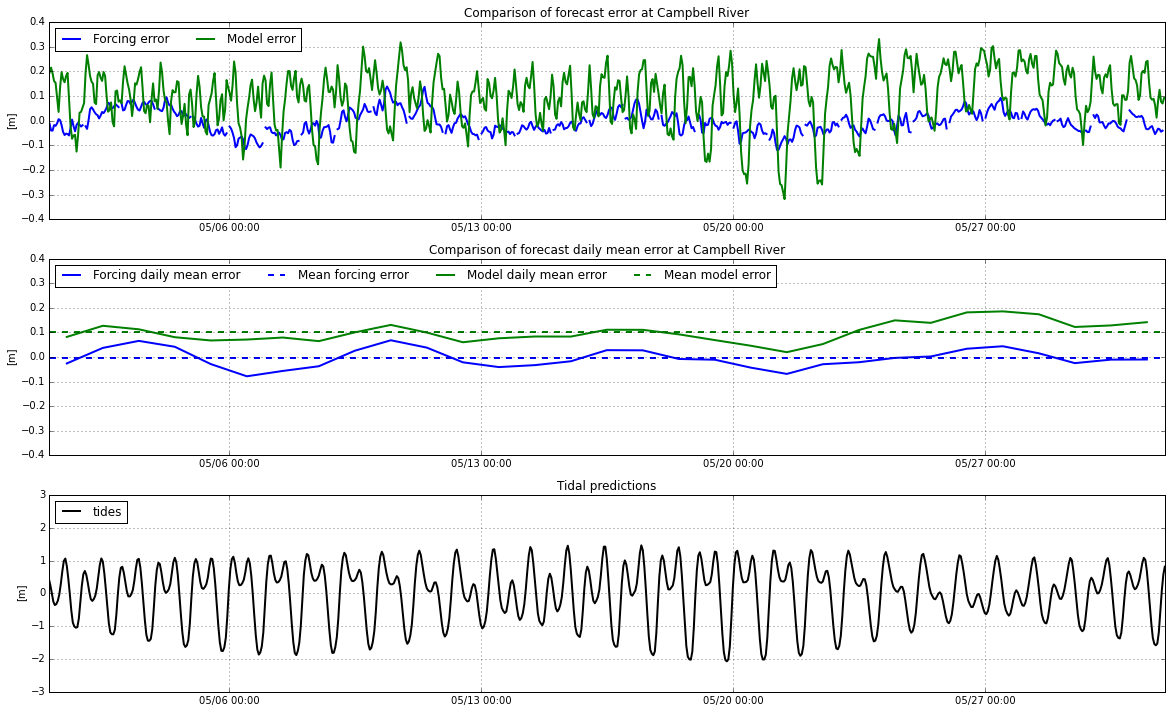

In [14]:
fig = residuals.compare_errors('Campbell River', 'forecast', t_orig,t_final,bathy)

forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur


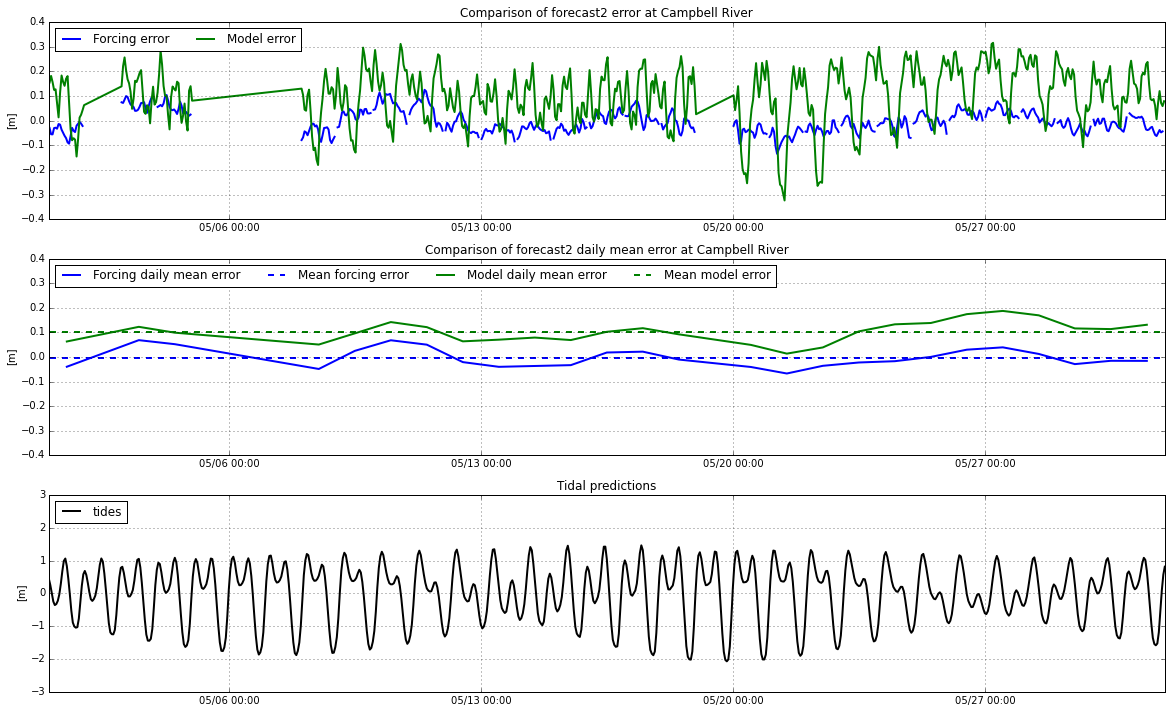

In [15]:
fig = residuals.compare_errors('Campbell River', 'forecast2', t_orig,t_final,bathy)

January 1-31
* For all three stations, the nowcasts did not show similar trends between
model and forcing error

* For all three stations, the error trends were similar for forecasts and
forecast2s.

* For Point Atkinson, either the mean model error equalled the mean forcing
error, or the mean model error was only slightly higher than the forcing
error.

* For Victoria and for all modes, the mean model error was about 15 cm lower
than the mean forcing error.

* For Campbell River, the mean model error was about 8 cm lower than the
mean forcing error.

* Campbell river had the noisiest nowcast.


In [16]:
def compare_locations(mode,start,end,bathy,figsize=(20,10)):
    
    # array of dates for iteration
    numdays = (end-start).days
    dates = [start + datetime.timedelta(days=num)
             for num in range(0, numdays+1)]
    dates.sort()
    
    fig,axs=plt.subplots(2,1,figsize=figsize)
    names=['Point Atkinson', 'Victoria', 'Campbell River']
    
    for name in names:
        force, model, time, time_daily = residuals.combine_errors(name, mode, dates, bathy)
        
        ax=axs[0]
        ax.plot(time, model['error'], label=name, lw=2)
        ax=axs[1]
        ax.plot(time_daily, model['daily'],label=name, lw=2)\
    #forcing    
    ax=axs[0]
    ax.plot(time, force['error'], 'k', label='forcing', lw=2)
    ax.set_title('{} error'.format(mode))
    ax=axs[1]
    ax.plot(time_daily, force['daily'], 'k', label='forcing', lw=2)
    ax.set_title('{} daily mean error'.format(mode))
    
    hfmt = mdates.DateFormatter('%m/%d %H:%M')
    for ax in axs:
        ax.xaxis.set_major_formatter(hfmt)
        ax.legend(loc=2, ncol=4)
        ax.grid()
        ax.set_xlim([start, end+datetime.timedelta(days=1)])
        ax.set_ylabel('[m]')
        
    return fig

forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur
forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur
forecast2 simulation for 2015-05-02 00:00:00 did not occur
forecast2 simulation for 2015-05-05 00:00:00 did not occur
forecast2 simulation for 2015-05-06 00:00:00 did not occur
forecast2 simulation for 2015-05-07 00:00:00 did not occur
forecast2 simulation for 2015-05-19 00:00:00 did not occur


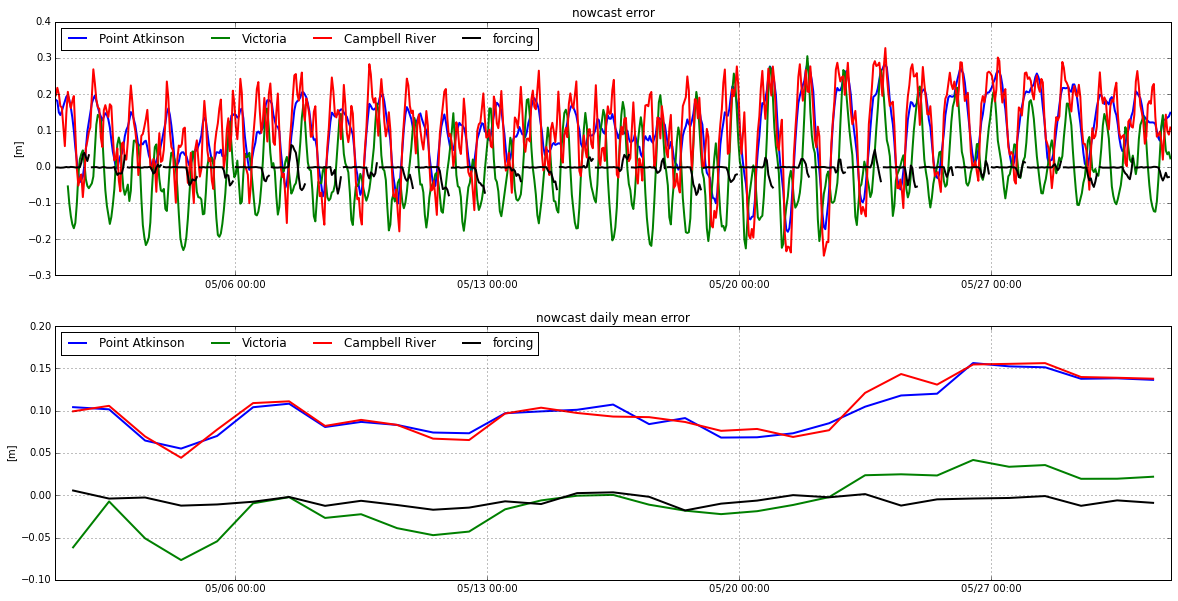

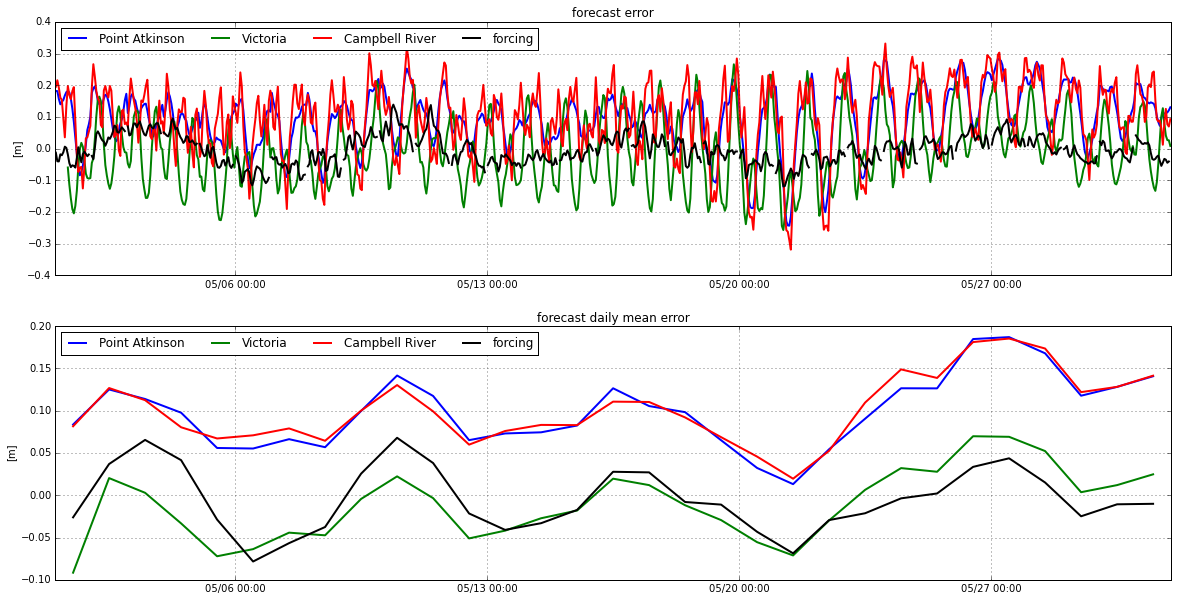

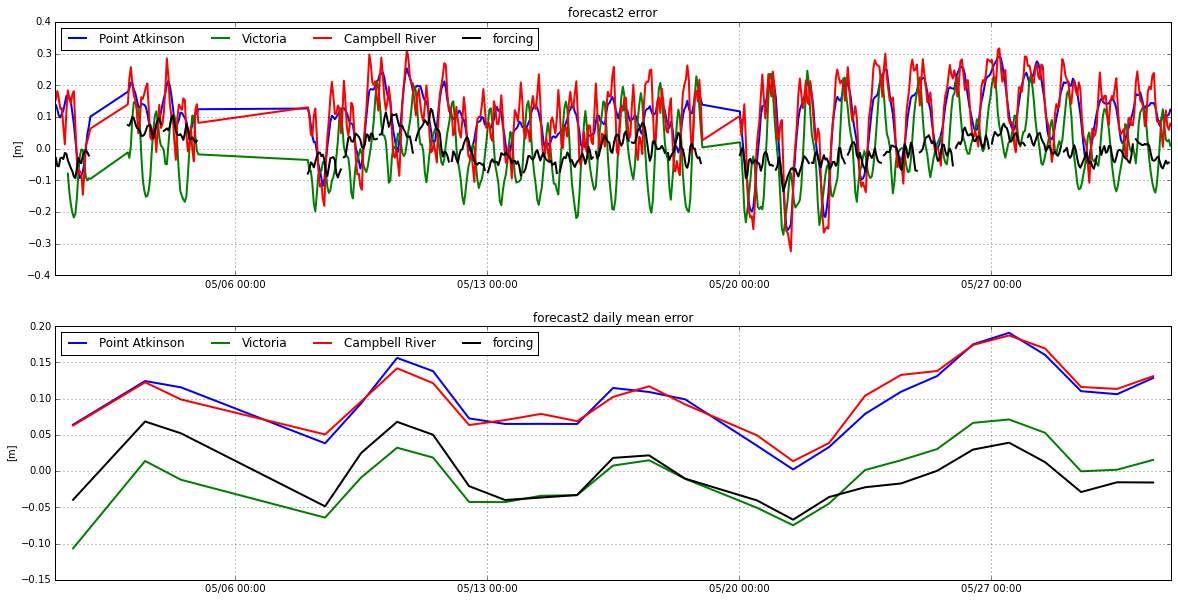

In [17]:

modes=['nowcast', 'forecast','forecast2']
for mode in modes:
    fig = compare_locations(mode, t_orig,t_final,bathy)

In [18]:
def NeahBay_residuals_time_series(mode, start,end,figsize=(20,5)):
    
    #observations
    start_date = start.strftime('%d-%b-%Y')
    end_date = end.strftime('%d-%b-%Y')
    stn_no = figures.SITES['Neah Bay']['stn_no']
    obs = figures.get_NOAA_wlevels(stn_no, start_date, end_date)
    tides = figures.get_NOAA_tides(stn_no, start_date, end_date)
    res_obs_NB = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)

    #forcings
    numdays = (end-start).days
    dates = [start + datetime.timedelta(days=num)
             for num in range(0, numdays+1)]
    dates.sort()

    force = np.array([])
    time = np.array([])
    for t_sim in dates:
        #truncation dates
        sdt = t_sim.replace(tzinfo=tz.tzutc())
        edt = sdt + datetime.timedelta(days=1)
        if mode in analyze.verified_runs(t_sim):
            filename_NB, run_date = analyze.create_path(mode, t_sim, 'ssh*.txt')
            if filename_NB:
                data = residuals._load_surge_data(filename_NB)
                surge, dates = residuals._retrieve_surge(data, run_date)
                surge_t, dates_t = analyze.truncate_data(np.array(surge),
                                                     np.array(dates), sdt, edt)
            force = np.append(force,surge_t)
            time = np.append(time, dates_t)
    
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.plot(time, force, label=mode)
    ax.plot(obs.time,res_obs_NB,label='observations')
    ax.legend()
    ax.grid()
    ax.set_xlim([start,end+datetime.timedelta(days=1)])
    ax.set_ylim([-.5,.5])
    ax.set_title('Time series for forcing and observed residuals at Neah Bay')
    
    return fig

In [19]:
fig= NeahBay_residuals_time_series('nowcast',t_orig,t_final)

AttributeError: 'module' object has no attribute 'calculate_residual'

In [ ]:
fig= NeahBay_residuals_time_series('forecast',t_orig,t_final)

In [ ]:
fig= NeahBay_residuals_time_series('forecast2',t_orig,t_final)